# **📏📦 Core Classical ML Algorithms (Part 2)**

## 1. **Support Vector Machines**


A Support Vector Machine (SVM) is a supervised machine learning algorithm primarily used for classification and regression tasks. It tries to find the best boundary known as hyperplane that separates different classes in the data. It is useful when you want to do binary classification like spam vs. not spam or cat vs. dog.

The main goal of SVM is to maximize the margin between the two classes. The larger the margin the better the model performs on new and unseen data.

## 🧩 Key Concepts in Simple Language

### 🔹 Hyperplane

- Think of it as a line (in 2D) or a flat surface (in higher dimensions) that splits data into different groups.
- Equation: w⋅x+b=0
    
    w ⋅ x + b = 0
    

### 🔹 Support Vectors

- These are the important data points that are closest to the hyperplane.
- They decide where the boundary goes.
- Without them, the SVM decision boundary would shift.

### 🔹 Margin

- The distance between the hyperplane and the support vectors.
- SVM’s goal = maximize this margin.
- Intuition: The bigger the gap, the more confident the model is when classifying new data.

### 🔹 Kernel

- A trick that helps when data can’t be separated by a straight line.
- Instead of drawing a line in the same space, we map data into a higher dimension where separation becomes possible.
- Types:
    - Linear Kernel → Works when data is already linearly separable.
    - Polynomial Kernel → Adds curved boundaries.
    - RBF (Radial Basis Function) → Most common, good for circular/complex boundaries.

### 🔹 Hard Margin vs. Soft Margin

- Hard Margin: The SVM tries to perfectly separate classes with no mistakes allowed.
    - Works well when data is clean and separable.
    - But fails if there’s noise/outliers.
- Soft Margin: SVM allows some errors (misclassifications) for the sake of better generalization.
    - More practical for real-world messy data.


### 🔹 Regularization Parameter (C)

- Controls the trade-off between:
    - A large margin (better generalization).
    - Fewer misclassifications.
- **High C** → forces model to classify correctly (less tolerance for error).
- **Low C** → allows more mistakes but focuses on larger margin.

### 🔹 Hinge Loss

- A special loss function SVM uses.
- Idea:
    - If a point is correctly classified and outside the margin → no penalty.
    - If it’s misclassified or inside the margin → penalty increases.

### 🔹 Dual Problem & Kernel Trick

- Instead of solving directly with www and bbb, SVM solves using Lagrange multipliers (α).
- This makes it possible to use the kernel trick → efficient for non-linear data.
- Bottom line: Dual problem makes SVM powerful without heavy math computations in high dimensions.

## ⚙️ How does SVM work?

The main idea behind SVM is:

👉 Find the best line (2D) or hyperplane (higher dimensions) that separates two classes.

- Many lines could separate the data.
- SVM picks the one that maximizes the margin → the largest gap between classes.
- The closest points from each class to this boundary are called support vectors.

📌 **Steps SVM takes:**

1. Looks at the data and tries to draw boundaries.
2. Chooses the hyperplane that gives the maximum margin.
3. Only the support vectors (boundary points) matter; the rest of the data doesn’t affect the decision boundary.

## 🎯 How does SVM classify the data?

Once the hyperplane is found:

- The equation is:

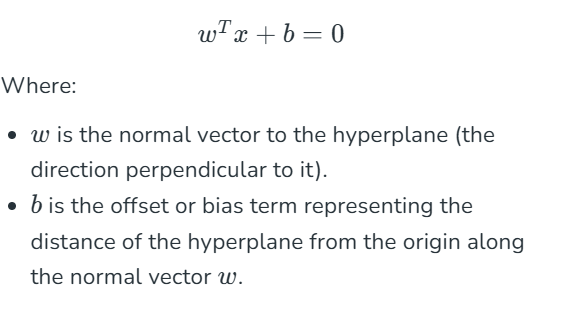

- Classification rule:
  
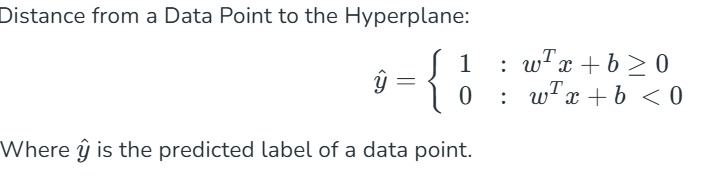

📌 Meaning:

- If the point lies on one side of the hyperplane → Class A (+1).
- If on the other side → Class B (–1).
- Margin ensures that new points that fall in between are classified with more confidence.

And yes → outliers don’t completely destroy SVM because of soft margin (it allows some violations instead of forcing a perfect separation).

## ✅  Advantages of SVM

- **High-dimensional performance** → works well when features are many (e.g., text, images, genetics).
- **Effective for non-linear problems** → kernels let SVM separate complex data.
- **Robust to outliers** → soft margin allows ignoring noise.
- **Versatile** → works for both binary and multi-class classification.
- **Memory efficient** → only support vectors matter, not the whole dataset.

## ❌ Disadvantages of SVM

- **Slow training** → becomes heavy with large datasets.
- **Hard to tune** → picking the right kernel, C, and γ can be tricky.
- **Noise sensitive** → overlapping/noisy classes confuse SVM.
- **Not very interpretable** → decision boundaries in high dimensions are hard to explain.
- **Needs scaling** → features must be normalized, otherwise one feature dominates.

## Implementing SVM Algorithm Using Scikit-Learn


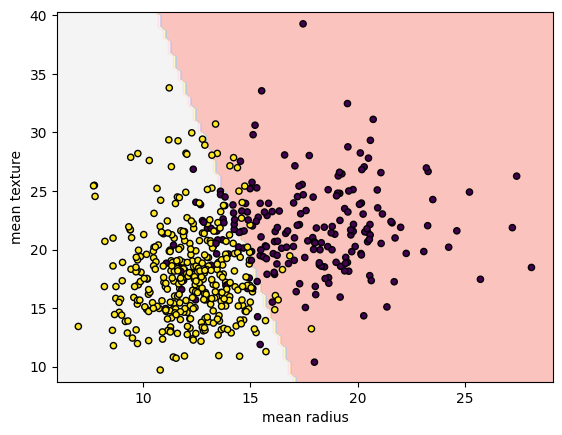

In [1]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target

svm = SVC(kernel="linear", C=1)
svm.fit(X, y)

DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        response_method="predict",
        alpha=0.8,
        cmap="Pastel1",
        xlabel=cancer.feature_names[0],
        ylabel=cancer.feature_names[1],
    )

plt.scatter(X[:, 0], X[:, 1], 
            c=y, 
            s=20, edgecolors="k")
plt.show()

- load_breast_cancer(): Loads the breast cancer dataset (features and target labels).
- SVC(kernel= linear, C=1): Creates a Support Vector Classifier with a linear kernel and regularization parameter C=1.
- svm.fit(X, y): Trains the SVM model on the feature matrix X and target labels y.
- DecisionBoundaryDisplay.from_estimator(): Visualizes the decision boundary of the trained model with a specified color map.
- plt.scatter(): Creates a scatter plot of the data points, colored by their labels.
- plt.show(): Displays the plot to the screen.

---

## Margin, hyperplane

### 🔹 Visual Intuition

- Imagine you’re separating red and blue balls on a table with a stick.

- The stick (line) is the hyperplane.

- You want to place it exactly in the middle of the closest red and blue balls.

- The distance between the stick and those closest balls = margin.

- The bigger the gap, the less chance new balls will fall on the wrong side.

## **Margin**

The margin is the gap between the decision boundary and the nearest data points of each class. SVM aims to maximize this margin for better classification performance.

- These closest points are called Support Vectors (they “support” the hyperplane).
- The margin is measured perpendicular to the hyperplane.

#### 📌 Goal of SVM: SVM aims to maximize this margin for better classification performance.

This ensures that the decision boundary is far from both classes → making the classifier more robust to new/unseen data.

## 🔸 Types of Margin in SVM:

1. **Hard Margin**
    - Forces the hyperplane to perfectly separate all training data (no mistakes).
    - Works only if data is linearly separable.
    - Problem: Not realistic in messy/noisy real-world data.
2. **Soft Margin**
    - Allows some points to fall inside the margin or be misclassified.
    - Uses a parameter C (regularization) to control penalty:
        - High C → less tolerance for misclassification (narrow margin).
        - Low C → more tolerance for misclassification (wider margin).
    - Works better in real-world scenarios.
      
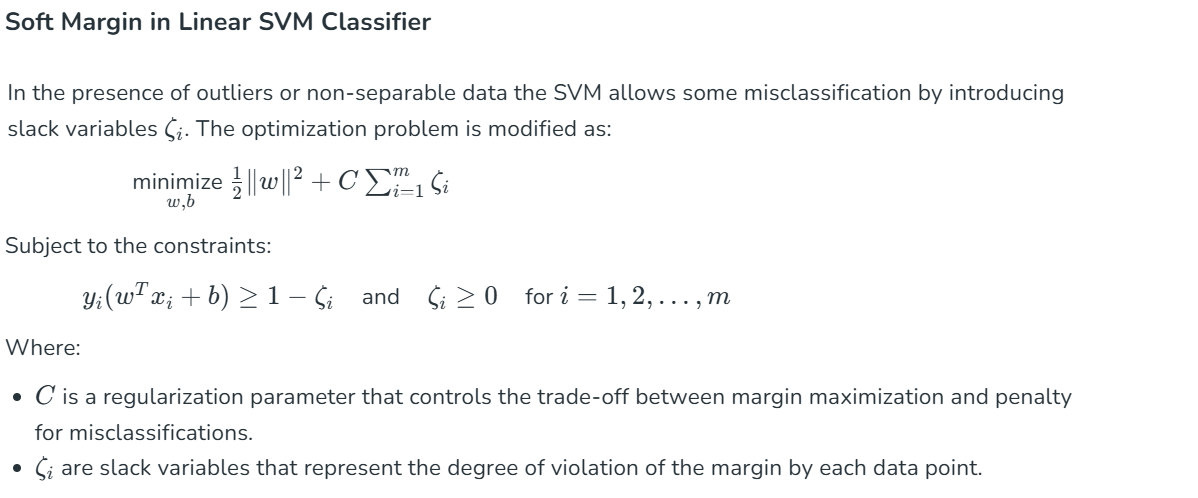    

## 🔸 Why Margin Matters?

- A **large margin** → better generalization → less overfitting.
- A **small margin** → classifier is too tight → may misclassify unseen data.

---

## **Hyperplane**

A decision boundary separating different classes in feature space and is represented by the equation wx + b = 0 in linear classification. It could be lines, 2D planes, or even n-dimensional planes that are beyond our imagination.

- w → weight vector (decides orientation of the hyperplane)
- x → input feature vector
- b → bias (shifts the hyperplane)

👉 Any point in space can be checked with this equation:

- If w ⋅ x + b > 0→ belongs to Class +1
- If w ⋅ x + b < 0 → belongs to Class -1

So, the hyperplane acts like a border between classes.

In general, if the data can be perfectly separated using a hyperplane, then there is an infinite number of hyperplanes, since they can be shifted up or down, or slightly rotated without coming into contact with an observation.

That is why we use the maximal margin hyperplane or optimal separating hyperplane which is the separating hyperplane that is farthest from the observations. 
Mathematically, the hyperplane is simply:

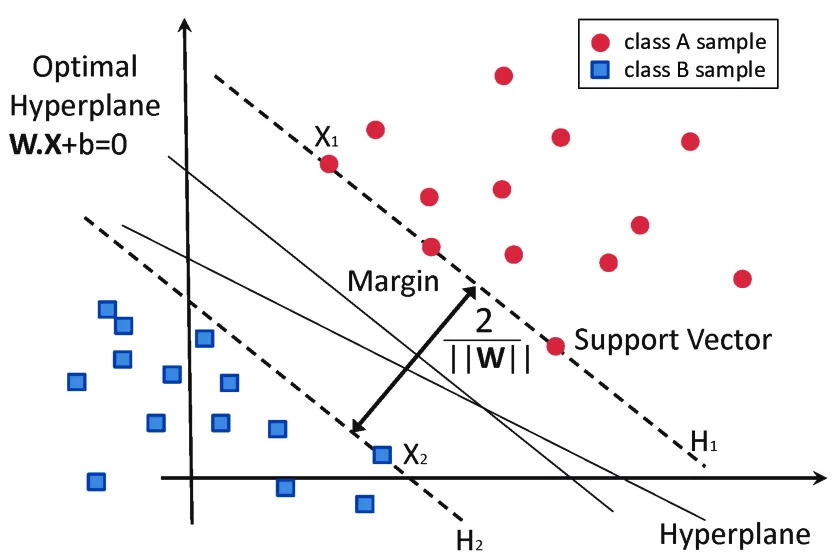

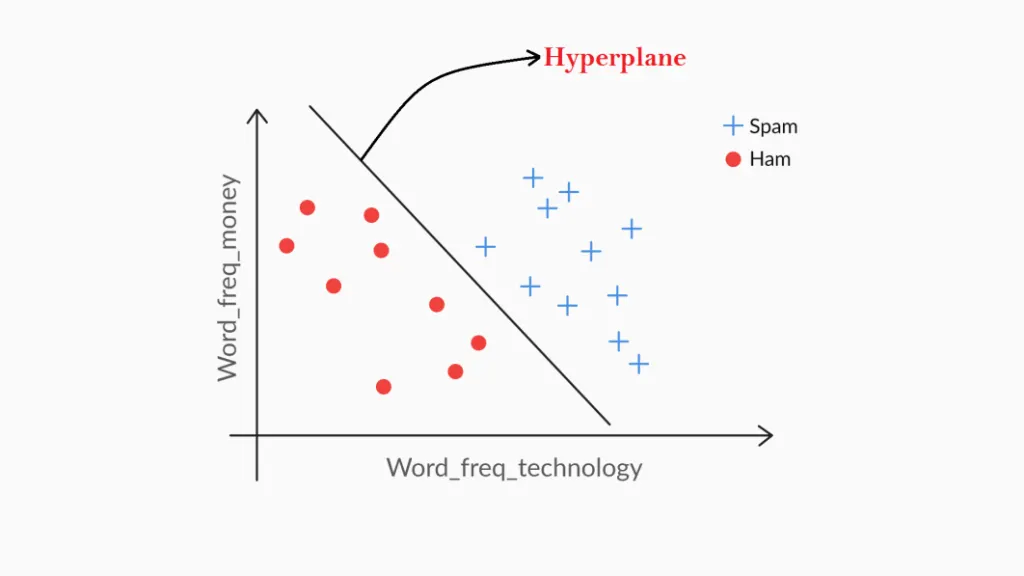



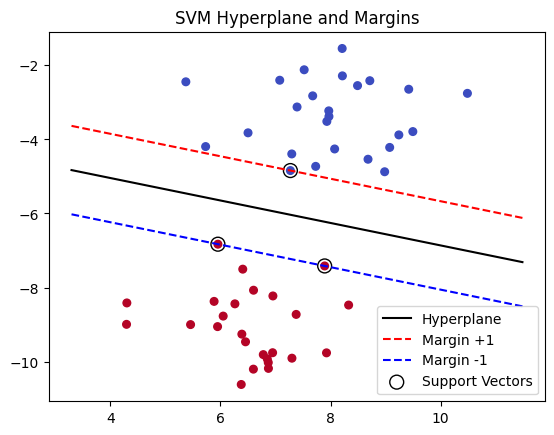

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Step 1: Create a simple dataset
X, y = datasets.make_blobs(n_samples=50, centers=2, random_state=6)

# Step 2: Train a linear SVM
clf = SVC(kernel='linear', C=1000)  # large C → hard margin
clf.fit(X, y)

# Step 3: Plot decision boundary and margins
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)

# Get the coefficients (w) and intercept (b)
w = clf.coef_[0]
b = clf.intercept_[0]

# Equation of hyperplane: w0*x + w1*y + b = 0
x_points = np.linspace(min(X[:,0])-1, max(X[:,0])+1, 100)
y_points = -(w[0]/w[1]) * x_points - b/w[1]
plt.plot(x_points, y_points, 'k-', label="Hyperplane")

# Margins: parallel lines at distance ±1/||w||
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
y_points_down = y_points + np.sqrt(1 + (w[0]/w[1])**2) * margin
y_points_up = y_points - np.sqrt(1 + (w[0]/w[1])**2) * margin

plt.plot(x_points, y_points_down, 'r--', label="Margin +1")
plt.plot(x_points, y_points_up, 'b--', label="Margin -1")

# Highlight support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label="Support Vectors")

plt.legend()
plt.title("SVM Hyperplane and Margins")
plt.show()


### Explanation
- Dataset creation: Generates 50 points in 2 clusters (binary classification).

- Train SVM: Uses SVC(kernel='linear', C=1000) → linear hard-margin SVM.

- Scatter plot: Plots the dataset with color-coded classes.

- Get weights: Extracts w (coefficients) & b (intercept) from SVM.

- Hyperplane: Equation w0*x + w1*y + b = 0 plotted as black line.

- Margins: Distance = 1/||w||. Plots two dashed lines (red & blue) parallel to hyperplane.

- Support vectors: Special points lying on the margin boundaries are highlighted with circles.

- Final plot: Shows hyperplane, margins, and support vectors.

👉 This visually demonstrates how SVM separates data with the maximum margin.

---

## **Linear vs kernel trick (high-level)**

## 🔹 1. **Nature of Decision Boundary**

- **Linear SVM**:
    - Creates a straight line (in 2D) or flat hyperplane (in higher dimensions) to separate data.
    - Works only if classes are roughly separable with a straight cut.
- **Kernel SVM**:
    - Creates a curved or complex boundary by applying the kernel trick.
    - Useful when classes are mixed in such a way that no straight line can separate them.


## 🔹 2. **When to Use**

- **Linear SVM**:
    - When features are already well-separated or nearly so.
    - Example: Spam detection (spam vs not spam), where text features often separate cleanly in high dimensions.
- **Kernel SVM**:
    - When data is not linearly separable.
    - Example: XOR problem, concentric circles, medical classification problems, etc.


## 🔹 3. **Computational Complexity**

- **Linear SVM**:
    - Faster, especially with very large datasets (millions of samples, many features).
    - Can be solved using specialized optimizers like LinearSVC.
- **Kernel SVM**:
    - Slower, because it computes a kernel matrix (pairwise similarity between all points).
    - Doesn’t scale well with very large datasets.


## 🔹 4. **Interpretability**

- **Linear SVM**:
    - Easy to interpret: coefficients show feature importance (like linear regression but with margins).
    - Good for feature selection and explainable models.
- **Kernel SVM**:
    - Harder to interpret because the transformation is implicit (done by kernel).
    - We don’t see the actual “mapped space.”


## 🔹 5. **Flexibility**

- **Linear SVM**:
    - Limited to straight-line separation.
    - Only works well if classes are already linearly separable.
- **Kernel SVM**:
    - Very flexible. With the right kernel, it can separate almost any dataset.
    - Example: RBF kernel can make boundaries bend around complex clusters.


## 🔹 6. **Examples**

- **Linear SVM**:
    - Imagine separating cats vs dogs using height & weight → a straight line might work.
- **Kernel SVM**:
    - Imagine separating inner vs outer circle of points → only a circular (non-linear) boundary can work.



## ✅ Summary Table

| Aspect | Linear SVM | Kernel SVM (Kernel Trick) |
| --- | --- | --- |
| Boundary | Straight line / flat hyperplane | Curved / complex |
| When to use | Linearly separable data | Non-linearly separable data |
| Speed | Very fast, scalable | Slower, expensive |
| Interpretability | Easy (weights = importance) | Harder to explain |
| Flexibility | Limited | Very flexible |
| Example | Spam vs Ham emails | Concentric circles (XOR problem) |



👉 So basically:

- **Linear SVM =** Fast, simple, straight cuts
- **Kernel SVM =** Smart, flexible, bends space to separate data

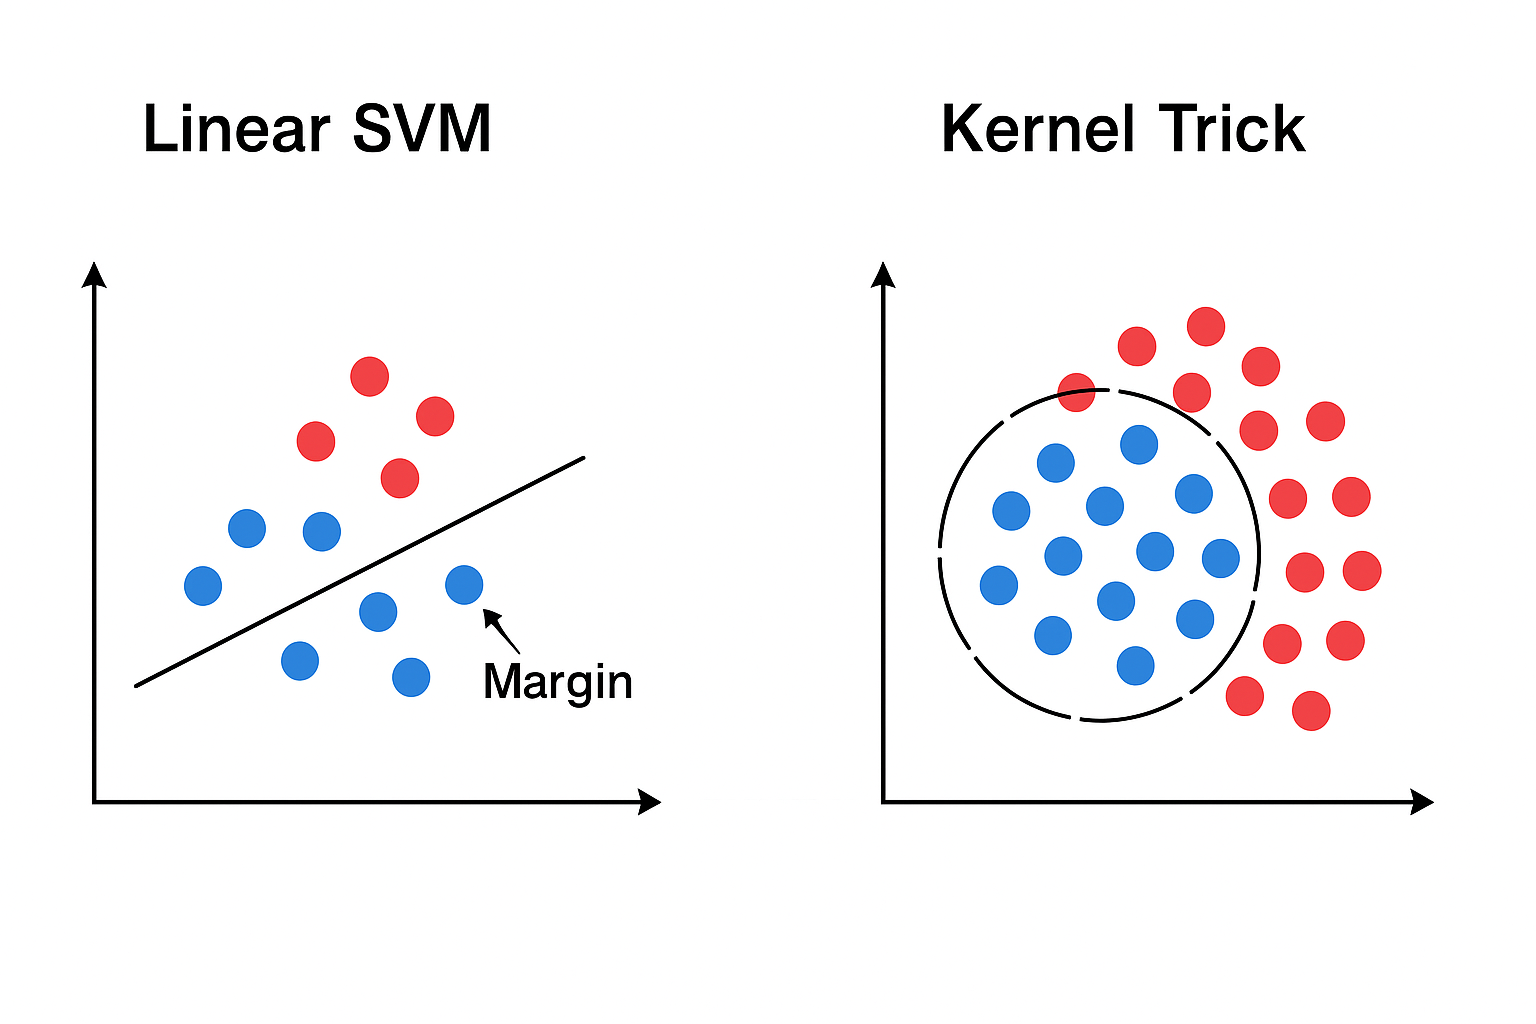

---

# **Naive Bayes**

Naive Bayes is a conditional probability model: it assigns probabilities. for each of the K possible outcomes or classes given a problem instance to be classified, represented by a vector. encoding some n features (independent variables).

- "Naive" → assumes all features are independent of each other.
- "Bayes" → because it’s built on Bayes’ Theorem.
- Mainly used in text classification (spam filters, sentiment analysis, etc.).


## 🔹 Assumptions of Naive Bayes

- Feature independence → one feature doesn’t affect another.
- Continuous features follow a Gaussian distribution.
- Discrete features follow a Multinomial distribution.
- All features contribute equally to prediction.
- No missing data allowed.

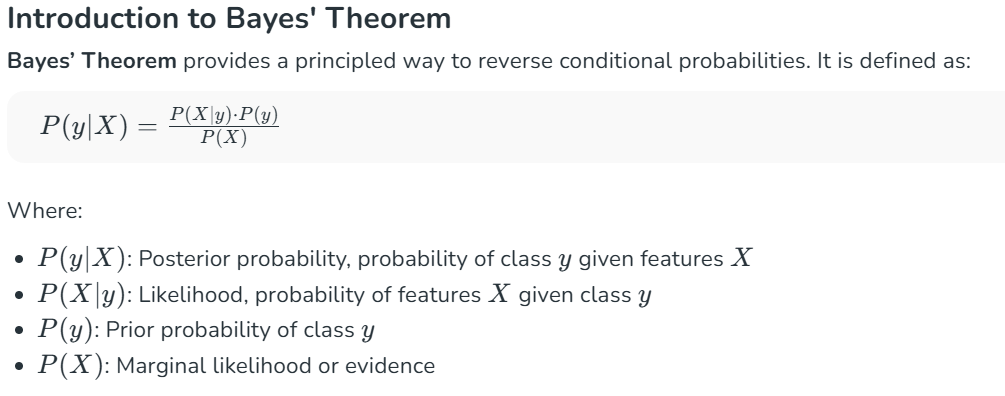

## 🔹 How Naive Bayes Works (Step-by-step)

- Calculate priors P(y) from dataset.
- Compute conditional probabilities P(xi∣y) for each feature.
- Apply Bayes’ Theorem to get posterior probability.
- Choose class with max posterior as prediction.

✅ Example (Play Golf dataset):

Given features (Sunny, Hot, Normal, False), compute:

- P(Yes∣X) and P(No∣X)
- Normalize → highest probability = prediction (Yes).

## 🔹 Types of Naive Bayes

1. **Gaussian Naive Bayes** → for continuous features (bell curve distribution).
2. **Multinomial Naive Bayes** → for discrete counts (word frequencies in text).
3. **Bernoulli Naive Bayes** → for binary features (presence/absence of words).



## ✅ Advantages

- Easy to implement, fast & efficient.
- Works well with large feature sets.
- Good with small datasets.
- Naturally handles categorical features.
- Often strong in text classification tasks.


## ❌ Disadvantages

- Assumes independence of features (rarely true in real-world).
- Sensitive to irrelevant features.
- Struggles with zero probabilities (if unseen data appears).
- Can underperform with correlated features.



## 🔹 Applications

- Spam Email Filtering: Classifies emails as spam or non-spam based on features.
- Text Classification: Used in sentiment analysis, document categorization, and topic classification.
- Medical Diagnosis: Helps in predicting the likelihood of a disease based on symptoms.
- Credit Scoring: Evaluates creditworthiness of individuals for loan approval.
- Weather Prediction: Classifies weather conditions based on various factors.


---

## **Gaussian, Multinomial, Bernoulli**

## **Gaussian**

Gaussian Naive Bayes is a type of Naive Bayes method working on continuous attributes and the data features that follows Gaussian distribution throughout the dataset. This “naive” assumption simplifies calculations and makes the model fast and efficient. Gaussian Naive Bayes is widely used because it performs well even with small datasets and is easy to implement and interpret.

Mathematics Behind Gaussian Naive Bayes


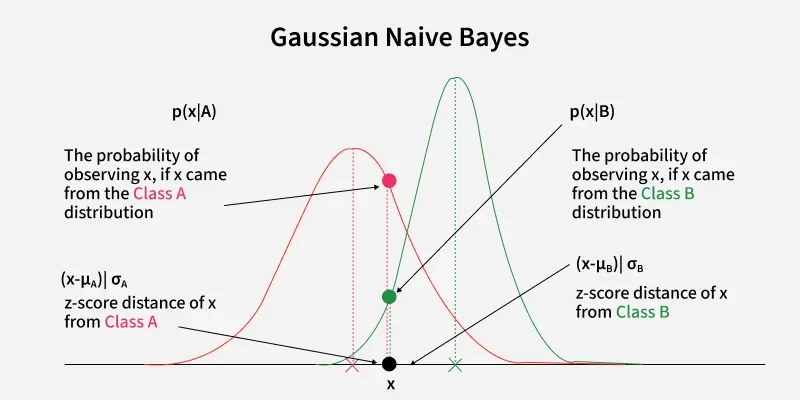

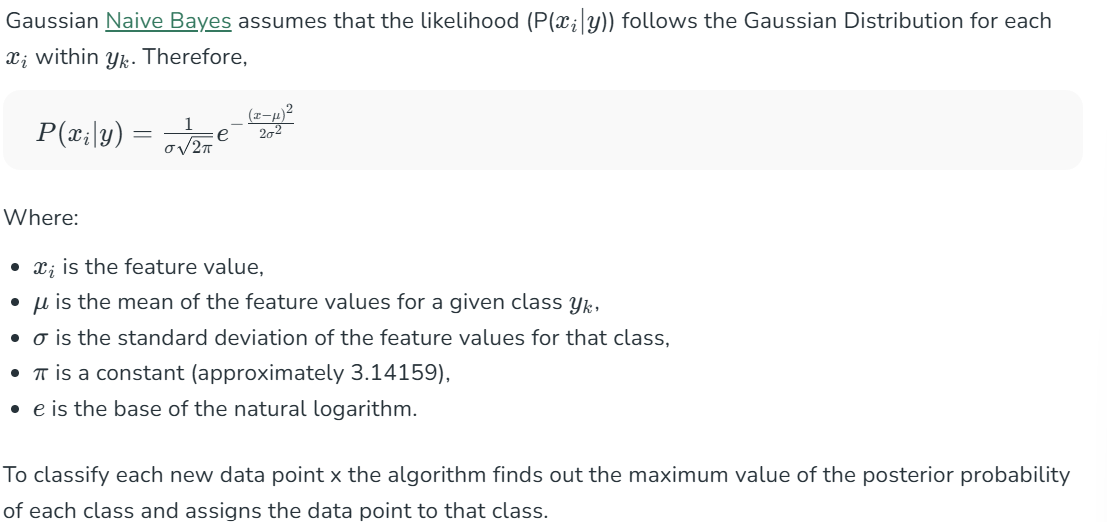

## **Gaussian Naive Bayes (GNB)**

- Assumes each feature follows a Gaussian distribution within each class.
- Suitable for continuous features (age, income, height, etc.).
- Works well when Gaussian assumption approximately holds.

**Why it works:**

- Calculates likelihood of a data point for each class using Gaussian PDF.
- Combines likelihoods with class priors to predict class.

## 🌍Why Gaussian is Important

- Appears everywhere: heights, weights, test scores, sensor noise, financial returns.
- Central Limit Theorem: The sum (or average) of many independent random variables tends toward a Gaussian distribution, even if the original variables aren’t Gaussian.
- In machine learning, Gaussian assumptions simplify modeling:
    - Naive Bayes Classifier often assumes Gaussian feature distribution.
    - Gaussian Mixture Models (GMMs) can model complex, multimodal distributions.

## ⚖️ Gaussian Properties

1. **Symmetry:** f(μ−x) = f(μ+x)
2. **Mean = Median = Mode:** Perfect balance.
3. **Defined by just two parameters:** μ and σ^2
4. **Moment generating function:** All moments (mean, variance, skewness, kurtosis) can be derived.
5. **Additivity:** Sum of independent Gaussians is Gaussian.

## 🤖 Gaussian in ML & Data Science

- **Naive Bayes:** Uses Gaussian PDF to compute probabilities for continuous features.
- **Anomaly Detection:** Outliers are far from the mean (low PDF values).
- **GMMs:** Model multiple Gaussian distributions for clustering.
- **Regularization:** Gaussian priors in Bayesian ML control overfitting.
- **Noise Modeling:** Real-world measurement noise is often Gaussian.


## 🌐Visual Intuition

- Narrow bell → low σ → most values are very close to μ.
- Wide bell → high σ → data is spread out.
- Shift left/right → change μ → moves the center.

In [12]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


- pandas → For creating dataframes and manipulating the dataset 🐼

- sklearn.datasets.load_iris → Loads the Iris flower dataset 🌸

- train_test_split → Splits data into training & testing sets 🧪

- GaussianNB → The Gaussian Naive Bayes classifier 🧠

- accuracy_score → Evaluates prediction accuracy ✅

- LabelEncoder → Converts categorical labels into numeric format 🔢

- numpy → For numerical operations, arrays, and linspace

- matplotlib.pyplot → For plotting Gaussian curves 📊

- scipy.stats.norm → For Gaussian (normal) probability density function calculations


In [13]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['Species'] = iris.target
X = data.drop("Species", axis=1)
y = data['Species']


- Loads Iris dataset (150 samples, 4 features: sepal length, sepal width, petal length, petal width)

- Creates a pandas DataFrame for easier manipulation

- X = Features (inputs)

- y = Target variable (species of Iris)

In [14]:
le = LabelEncoder()
y = le.fit_transform(y)


- Converts the target labels into numeric values (0, 1, 2)

- Required because GaussianNB works with numeric classes

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


- Splits data into:

    - 70% training → model learns patterns

    - 30% testing → model is evaluated on unseen data

- random_state=42 ensures reproducibility

In [16]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)


GaussianNB()

- Initializes the Gaussian Naive Bayes model

- fit() trains the model on the training data:

    - Computes mean (μ) and variance (σ²) of each feature for each class

    - Stores these internally in gnb.theta_ (means) and gnb.var_ (variances)

In [17]:
feature_names = iris.feature_names
num_features = len(feature_names)
num_classes = len(np.unique(y))
X_np = X.to_numpy()


- feature_names → List of feature names for labeling plots

- num_features → Number of features = 4

- num_classes → Number of classes = 3 (Setosa, Versicolor, Virginica)

- X_np → Convert dataframe to numpy array for easier numerical operations

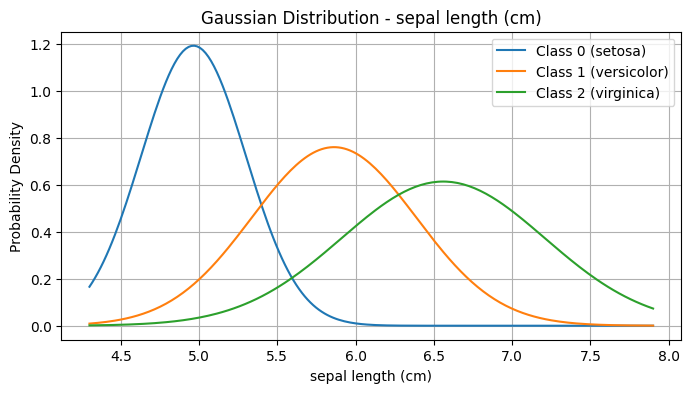

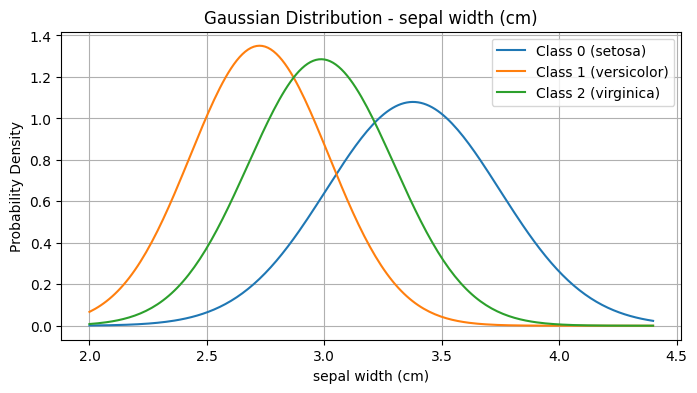

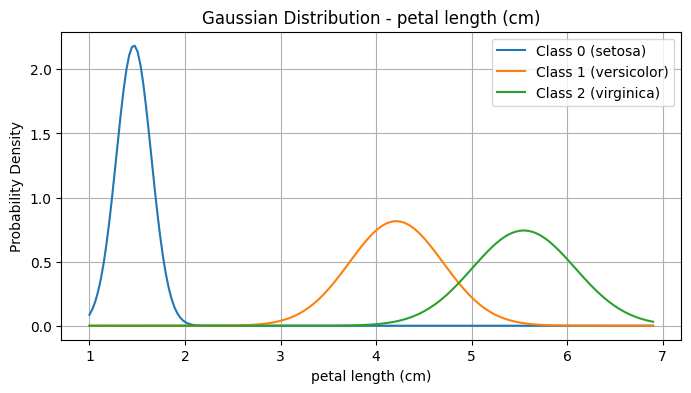

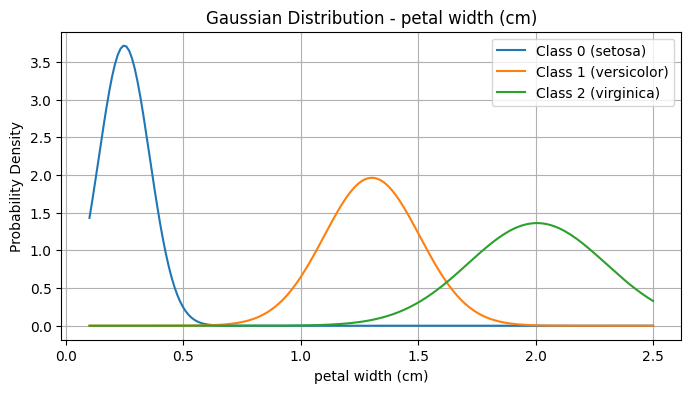

In [19]:
for feature_index in range(num_features):
    feature_name = feature_names[feature_index]
    x_vals = np.linspace(X_np[:, feature_index].min(), X_np[:, feature_index].max(), 200)

    plt.figure(figsize=(8, 4))

    for cls in range(num_classes):
        mean = gnb.theta_[cls, feature_index]
        std = np.sqrt(gnb.var_[cls, feature_index])
        y_vals = norm.pdf(x_vals, mean, std)
        plt.plot(x_vals, y_vals, label=f"Class {cls} ({iris.target_names[cls]})")

    plt.title(f"Gaussian Distribution - {feature_name}")
    plt.xlabel(feature_name)
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid(True)
    plt.show()


# **Multinomial**

Multinomial Naive Bayes is a probabilistic classification algorithm based on Bayes' theorem with a naive independence assumption between features. It is particularly well-suited for classification tasks where features represent counts or frequencies, such as in text classification. It models the frequency of words as counts and assumes each feature or word is multinomially distributed. MNB is widely used for tasks like classifying documents based on word frequencies like in spam email detection.

## **How Multinomial Naive Bayes Works 📝**

In Multinomial Naive bayes the word "Naive" means that the method assumes all features like words in a sentence are independent from each other and "Multinomial" refers to how many times a word appears or how often a category occurs. It works by using word counts to classify text. The main idea is that it assumes each word in a message or feature is independent of each others. This means the presence of one word doesn't affect the presence of another word which makes the model easy to use.

The model looks at how many times each word appears in messages from different categories (like "spam" or "not spam"). For example if the word "free" appears often in spam messages that will be used to help predict whether a new message is spam or not.

To calculate the probability of a message belonging to a certain category Multinomial Naive Bayes uses the multinomial distribution:

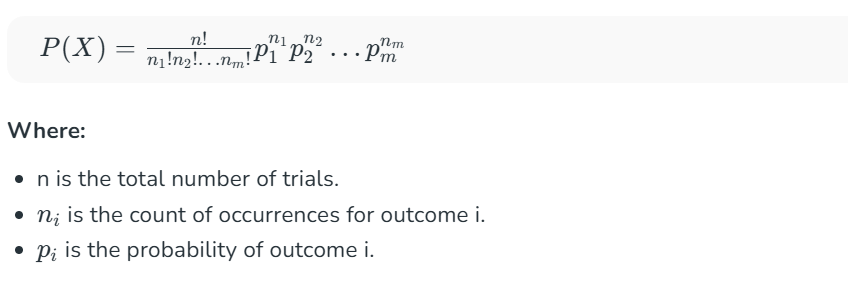

| **Multinomial Naive Bayes** | **Gaussian Naive Bayes** |
| --- | --- |
| It specially designed for discrete data particularly text data. | It is suitable for continuous data where features follow a Gaussian distribution. |
| It assumes features and represent its counts like word counts. | It assumes a Gaussian distribution for the likelihood. |
| It is commonly used in NLP for document classification tasks. | It is commonly used in tasks involving continuous data such as medical diagnosis, fraud detection and weather prediction. |
| The likelihood of each feature is calculated using the multinomial distribution. | The likelihood of each feature is modeled using the Gaussian distribution. |
| It is more efficient when the number of features is very high like in text datasets with thousands of words. | It can handle continuous data but if the data is sparse or contains many outliers it struggle with accuracy |

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


pandas → For creating and handling the dataset.

CountVectorizer → Converts text into numerical word count vectors (bag-of-words model).

train_test_split → Splits dataset into training and testing sets.

MultinomialNB → The Naive Bayes classifier for count-based features.

accuracy_score → Measures how well the model predicts correctly.

In [22]:
data = {
    'text': [
        'Free money now',
        'Call now to claim your prize',
        'Meet me at the park',
        'Let’s catch up later',
        'Win a new car today!',
        'Lunch plans?',
        'Congratulations! You won a lottery',
        'Can you send me the report?',
        'Exclusive offer for you',
        'Are you coming to the meeting?'
    ],
    'label': ['spam', 'spam', 'not spam', 'not spam', 'spam', 'not spam', 'spam', 'not spam', 'spam', 'not spam']
}

df = pd.DataFrame(data)

Creates a small example dataset of messages and their labels (spam or not spam).

df → A pandas DataFrame with columns 'text' and 'label'.

In [23]:
df['label'] = df['label'].map({'spam': 1, 'not spam': 0})

The labels (spam and not spam) are mapped to numerical values where spam becomes 1 and not spam becomes 0. This is necessary for the classifier, as it works with numerical data.






In [24]:
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

- X → Feature column (text messages).

- y → Target column (spam/not spam).

- Splits data into 70% training and 30% testing.

In [25]:
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)


- CountVectorizer is used to convert text data into numerical vectors. It counts the occurrences of each word in the corpus.
- fit_transform() is applied to the training data to learn the vocabulary and transform it into a feature matrix.
- transform() is applied to the test data to convert it into the same feature space.

In [27]:
model = MultinomialNB()
model.fit(X_train_vectors, y_train)


MultinomialNB()

A Multinomial Naive Bayes classifier is created and trained using the vectorized training data (X_train_vectors) and corresponding labels (y_train).






In [28]:
y_pred = model.predict(X_test_vectors)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%\n")

Accuracy: 66.67%



- predict() → Predicts labels for test messages.

- accuracy_score() → Calculates the percentage of correct predictions.

In [29]:
custom_message = ["Congratulations, you've won a free vacation"]
custom_vector = vectorizer.transform(custom_message)
prediction = model.predict(custom_vector)
print("Prediction for custom message:", "Spam" if prediction[0] == 1 else "Not Spam")


Prediction for custom message: Spam


- We create a custom message and transform it into a vector using vectorizer.transform().
- The vectorized message is passed to model.predict() to get the prediction.
- We print the result, interpreting 1 as “Spam” and 0 as “Not Spam”.

---

# **Bernoulli**

Bernoulli Naive Bayes is a subcategory of the Naive Bayes Algorithm. It is typically used when the data is binary and it models the occurrence of features using Bernoulli distribution. It is used for the classification of binary features such as 'Yes' or 'No', '1' or '0', 'True' or 'False' etc. Here it is to be noted that the features are independent of one another. 

### Mathematics Behind Bernoulli Naive Bayes

The core of Bernoulli Naive Bayes is based on Bayes’ Theorem which helps in calculating the conditional probability of a given class y given some data x=(x1,x2,...,xn). Now in the Bernoulli Naive Bayes model we assume that each feature is conditionally independent given the class y. This means that we can calculate the likelihood of each feature occurring as:

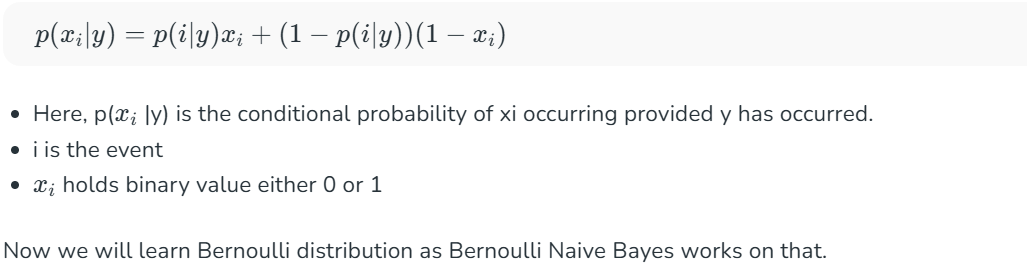

### Bernoulli distribution

Bernoulli distribution is used for discrete probability calculation. It either calculates success or failure. Here the random variable is either 1 or 0 whose chance of occurring is either denoted by p or (1-p) respectively.

The mathematical formula is given:

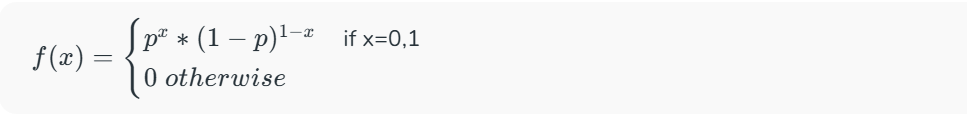

Now in the above function if we put x=1 then the value of f(x) is p and if we put x=0 then the value of f(x) is 1-p. Here p denotes the success of an event.

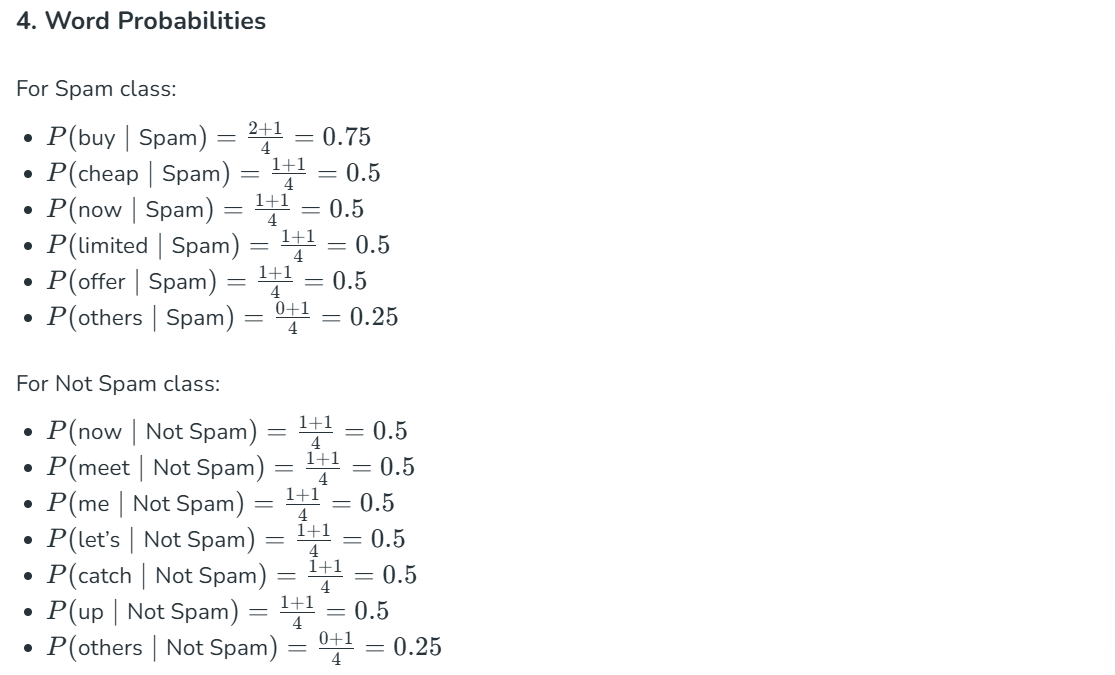

=== Text Classification ===
Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



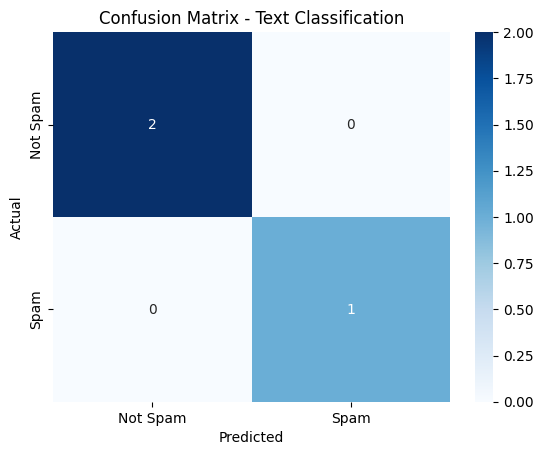

Prediction for custom message: Spam

=== Numeric Binary Classification ===
Predictions: [0 0 1]
Accuracy: 1.0
ROC-AUC: 1.0


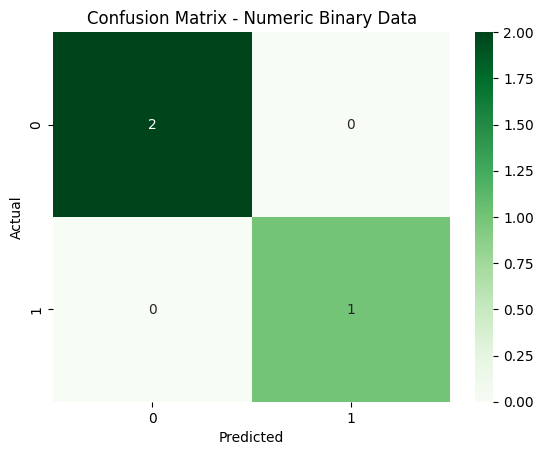

In [32]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


# Part 1: Text Classification
# Sample text dataset
data = {
    'text': [
        'Free money now',
        'Call now to claim your prize',
        'Meet me at the park',
        'Let’s catch up later',
        'Win a new car today!',
        'Lunch plans?',
        'Congratulations! You won a lottery',
        'Can you send me the report?',
        'Exclusive offer for you',
        'Are you coming to the meeting?'
    ],
    'label': ['spam', 'spam', 'not spam', 'not spam', 'spam', 
              'not spam', 'spam', 'not spam', 'spam', 'not spam']
}

# Create DataFrame
df = pd.DataFrame(data)
df['label'] = df['label'].map({'spam': 1, 'not spam': 0})

# Features and labels
X = df['text']
y = df['label']

# Spliting dataset with stratification to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Convert text to binary features
vectorizer = CountVectorizer(binary=True)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Bernoulli Naive Bayes
model_text = BernoulliNB()
model_text.fit(X_train_vec, y_train)

# Predictions
y_pred = model_text.predict(X_test_vec)

# Evaluation
print("=== Text Classification ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam','Spam'], yticklabels=['Not Spam','Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Text Classification')
plt.show()

# Custom message prediction
custom_msg = ["Congratulations, claim your free prize now!"]
custom_vec = vectorizer.transform(custom_msg)
prediction = model_text.predict(custom_vec)
print("Prediction for custom message:", "Spam" if prediction[0] == 1 else "Not Spam")


# Part 2: Numeric Binary Data
# Sample numeric dataset (binary features)
X_bin = np.array([
    [1, 0, 1],  # Patient 1
    [1, 1, 0],  # Patient 2
    [0, 0, 1],  # Patient 3
    [0, 1, 1],  # Patient 4
    [1, 0, 0],  # Patient 5
    [0, 1, 0]   # Patient 6
])
y_bin = np.array([1, 1, 0, 0, 1, 0])  # Disease present(1)/absent(0)

# Split with stratify to ensure both classes in train and test
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_bin, y_bin, test_size=0.4, random_state=42, stratify=y_bin
)

# Train Bernoulli NB
model_bin = BernoulliNB()
model_bin.fit(X_train_b, y_train_b)

# Predictions
y_pred_b = model_bin.predict(X_test_b)

# Evaluation
print("\n=== Numeric Binary Classification ===")
print("Predictions:", y_pred_b)
print("Accuracy:", accuracy_score(y_test_b, y_pred_b))
print("ROC-AUC:", roc_auc_score(y_test_b, y_pred_b))

# Confusion Matrix
cm_bin = confusion_matrix(y_test_b, y_pred_b)
sns.heatmap(cm_bin, annot=True, fmt='d', cmap='Greens', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Numeric Binary Data')
plt.show()


### **Imports**

- Libraries for data handling (`pandas`, `numpy`), text/vectorization (`CountVectorizer`), modeling (`BernoulliNB`), evaluation, and plotting (`matplotlib`, `seaborn`).



### **Part 1: Text Classification**

- Dataset: small set of messages labeled as spam/not spam (`1/0`).
- Split data (train/test) with stratification to keep class balance.
- `CountVectorizer(binary=True)`: converts text to binary word features.
- Train `BernoulliNB` on training data.
- Evaluate: accuracy, classification report, confusion matrix.
- Predict on a custom message.


### **Part 2: Numeric Binary Data**

- Dataset: numeric binary features (0/1), target = disease present/absent.
- Split train/test with stratification.
- Train `BernoulliNB`.
- Evaluate: predictions, accuracy, ROC-AUC, confusion matrix.

| **Aspect** | **Gaussian Naive Bayes** | **Multinomial Naive Bayes** | **Bernoulli Naive Bayes** |
| --- | --- | --- | --- |
| **Feature Type** | Continuous (real-valued features) | Discrete (count data or frequency-based features) | Binary (presence or absence of features) |
| **Assumption** | Assumes data follows a Gaussian (normal) distribution | Assumes data follows a multinomial distribution | Assumes data follows a Bernoulli (binary) distribution |
| **Common Use Case** | Suitable for continuous features like height, weight, etc. | Suitable for text classification (word counts) | Suitable for binary classification tasks (e.g., spam detection) |
| **Data Representation** | Features are treated as continuous variables | Features are treated as discrete counts or frequencies | Features are treated as binary (0 or 1) values |
| **Mathematical Model** | Uses Gaussian distribution (mean and variance) for each feature | Uses the multinomial distribution for word counts in text classification | Uses Bernoulli distribution (probability of a feature being present) |
| **Example** | Predicting whether an email is spam based on numeric features | Predicting whether a document is spam based on word counts | Classifying a document as spam or not based on word presence |

# **Why "naive" assumption works**

- **The “naive” part**
    - Naive Bayes assumes that all features are independent given the class.
    - Example: in spam detection, it treats the presence of “free” and “prize” as independent, even though in reality they may appear together.
    - This is obviously not true in real life, hence the “naive” label.
- **Why it still works**
    - We care about the product of probabilities, not exact correlations.
    - Even if features are correlated, the model often still assigns higher probability to the correct class.
    - In other words, it gets the “ranking” of classes right, which is enough for classification.
- **High-dimensional spaces help**
    - With text, you have thousands of words. Most words are rare and almost independent in practice.
    - So the independence assumption isn’t perfect, but it’s good enough to capture the main signals.
- **Probabilities get “smoothed”**
    - Using techniques like Laplace smoothing, the model avoids zero probabilities, which stabilizes performance even if the independence assumption is violated.
- **Works surprisingly well in practice**
    - Especially in text classification, spam detection, sentiment analysis, and other domains where features are mostly sparse.
    - Accuracy can be competitive with more complex models even though the independence assumption is false.

---


# Hands On

## Build Gaussian Naive Bayes manually (use Bayes theorem)

In [6]:
import numpy as np

class GaussianNB:
    def fit(self, X, y):
        X = np.asarray(X, dtype=float)
        y = np.asarray(y)
        self.classes = np.unique(y)
        self.means = {}
        self.vars = {}
        self.priors = {}
        for c in self.classes:
            Xc = X[y == c]
            self.means[c] = Xc.mean(axis=0)
            self.vars[c] = Xc.var(axis=0) + 1e-6
            self.priors[c] = len(Xc) / len(X)
        return self

    def _gaussian_pdf(self, x, mean, var):
        coeff = 1.0 / np.sqrt(2.0 * np.pi * var)
        exponent = np.exp(- (x - mean) ** 2 / (2.0 * var))
        return coeff * exponent

    def predict(self, X):
        X = np.asarray(X, dtype=float)
        preds = []
        for sample in X:
            scores = {}
            for c in self.classes:
                log_prior = np.log(self.priors[c])
                log_likelihood = np.log(self._gaussian_pdf(sample, self.means[c], self.vars[c])).sum()
                scores[c] = log_prior + log_likelihood
            preds.append(max(scores, key=scores.get))
        return np.array(preds)

    def predict_proba(self, X):
        X = np.asarray(X, dtype=float)
        all_scores = []
        for sample in X:
            scores = []
            for c in self.classes:
                log_prior = np.log(self.priors[c])
                log_likelihood = np.log(self._gaussian_pdf(sample, self.means[c], self.vars[c])).sum()
                scores.append(log_prior + log_likelihood)
            scores = np.array(scores)
            a = scores.max()
            probs = np.exp(scores - a)
            probs = probs / probs.sum()
            all_scores.append(probs)
        return np.array(all_scores)

if __name__ == "__main__":
    rng = np.random.default_rng(0)
    # simple toy data
    mean0 = np.array([1.0, 2.0]); var0 = np.array([0.2, 0.3])
    mean1 = np.array([3.0, 3.5]); var1 = np.array([0.25, 0.35])
    X0 = rng.normal(mean0, np.sqrt(var0), size=(60, 2))
    X1 = rng.normal(mean1, np.sqrt(var1), size=(60, 2))
    X = np.vstack([X0, X1])
    y = np.array([0]*60 + [1]*60)
    idx = rng.permutation(len(y)); X, y = X[idx], y[idx]
    split = int(0.8 * len(y))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    model = GaussianNB().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = (y_pred == y_test).mean()
    print("Accuracy:", round(float(acc), 3))
    print("First 5 probs:\n", np.round(model.predict_proba(X_test[:5]), 4))
    print("Classes order:", model.classes)


Accuracy: 1.0
First 5 probs:
 [[1.000e+00 0.000e+00]
 [0.000e+00 1.000e+00]
 [0.000e+00 1.000e+00]
 [1.000e-04 9.999e-01]
 [9.999e-01 1.000e-04]]
Classes order: [0 1]


 1. Train phase

    - For each class → calculate:

        - Mean of features

        - Variance of features

        - Prior (class frequency / total samples)

### 2. Gaussian PDF (likelihood)

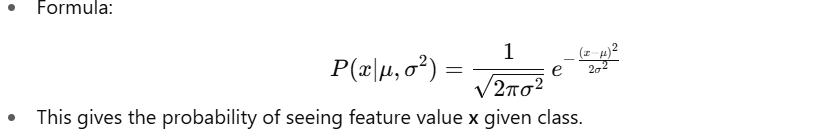

 3. Prediction

    - For a new sample:

        - Calculate likelihood for each feature → multiply (or sum logs).

        - Multiply with prior.

        - Choose class with highest posterior probability.

4. Testing

    - Compare predicted vs actual labels.

    - Compute accuracy.
  
---

## Train sklearn.svm.SVC with linear & RBF kernel

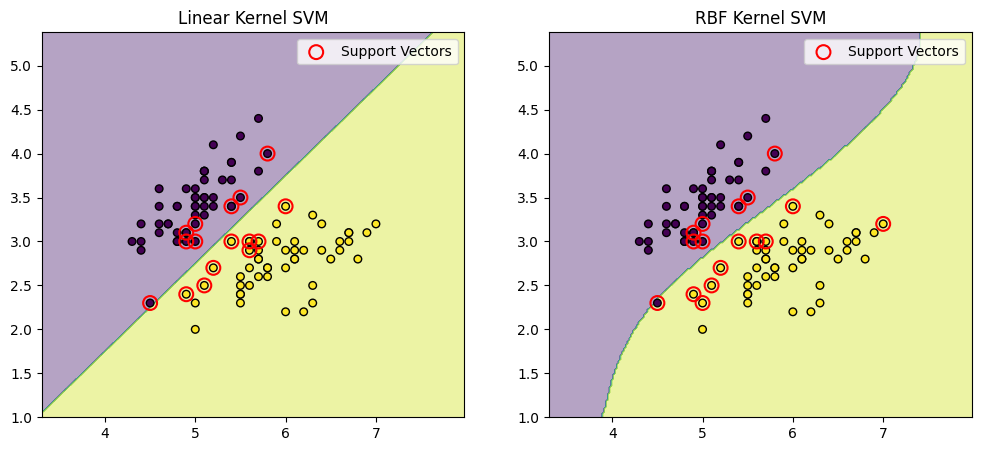

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 1️⃣ Load dataset (use only first 2 features)
iris = datasets.load_iris()
X = iris.data[:, :2]  # sepal length & width
y = iris.target

# 2️⃣ Binary classification: keep only classes 0 and 1
X = X[y != 2]
y = y[y != 2]

# 3️⃣ Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 4️⃣ Train Linear Kernel SVM
svm_linear = SVC(kernel="linear", C=1)
svm_linear.fit(X_train, y_train)

# 5️⃣ Train RBF Kernel SVM
svm_rbf = SVC(kernel="rbf", gamma=0.7, C=1)
svm_rbf.fit(X_train, y_train)

# 6️⃣ Function to plot decision boundary and support vectors
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # step size for mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision regions
    plt.contourf(xx, yy, Z, alpha=0.4)
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k')
    # Highlight support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='red', linewidths=1.5,
                label="Support Vectors")
    plt.title(title)
    plt.legend()

# 7️⃣ Plot Linear vs RBF SVM side by side
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_decision_boundary(svm_linear, X, y, "Linear Kernel SVM")

plt.subplot(1, 2, 2)
plot_decision_boundary(svm_rbf, X, y, "RBF Kernel SVM")

plt.show()


### What Happens Here

- Linear SVM → Straight line separating two classes.

- RBF SVM → Curved boundary, adapts to more complex patterns.

- Support vectors → Red circles, these are points that “define” the margin.

- Decision regions → Colored background shows predicted class for each region.